Wine Quality Prediction


https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
wine_df = pd.read_csv('winequality-red.csv')

# Overall

In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Input variables (based on physicochemical tests):**

1. fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2. volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3. citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines.

4. residual suga : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

5. chlorides : the amount of salt in the wine.

6. total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

7. density : the density of water is close to that of water depending on the percent alcohol and sugar content.

8. sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

9. free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

10. pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

11. alcohol : the percent alcohol content of the wine.

credit: https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability

**Output variable (based on sensory data):**

1. quality : score between 0 and 10 given by human wine tasters.

credit: https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All features are float. Dependent variable (quality) is an integer score. (1-10)

In [8]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We do not have any null values among the dataset

In [9]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Dependent Feature: quality

In [11]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

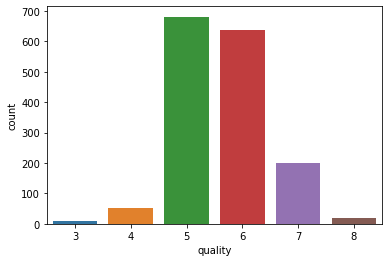

In [12]:
sns.countplot(wine_df['quality'])

dependent feature is dominated by 2 values: 5 and 6

#Numerical Features

In [32]:
import math
table_length = 8
for i in range(math.ceil(len(wine_df.columns)/table_length)):
    cols = wine_df.columns[table_length * i: table_length * (i+1)]
    display(wine_df[cols].describe())
    print('\n')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690


,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,0.658149,10.422983,5.636023
std,0.154386,0.169507,1.065668,0.807569
min,2.740000,0.330000,8.400000,3.000000
25%,3.210000,0.550000,9.500000,5.000000
50%,3.310000,0.620000,10.200000,6.000000
75%,3.400000,0.730000,11.100000,6.000000
max,4.010000,2.000000,14.900000,8.000000


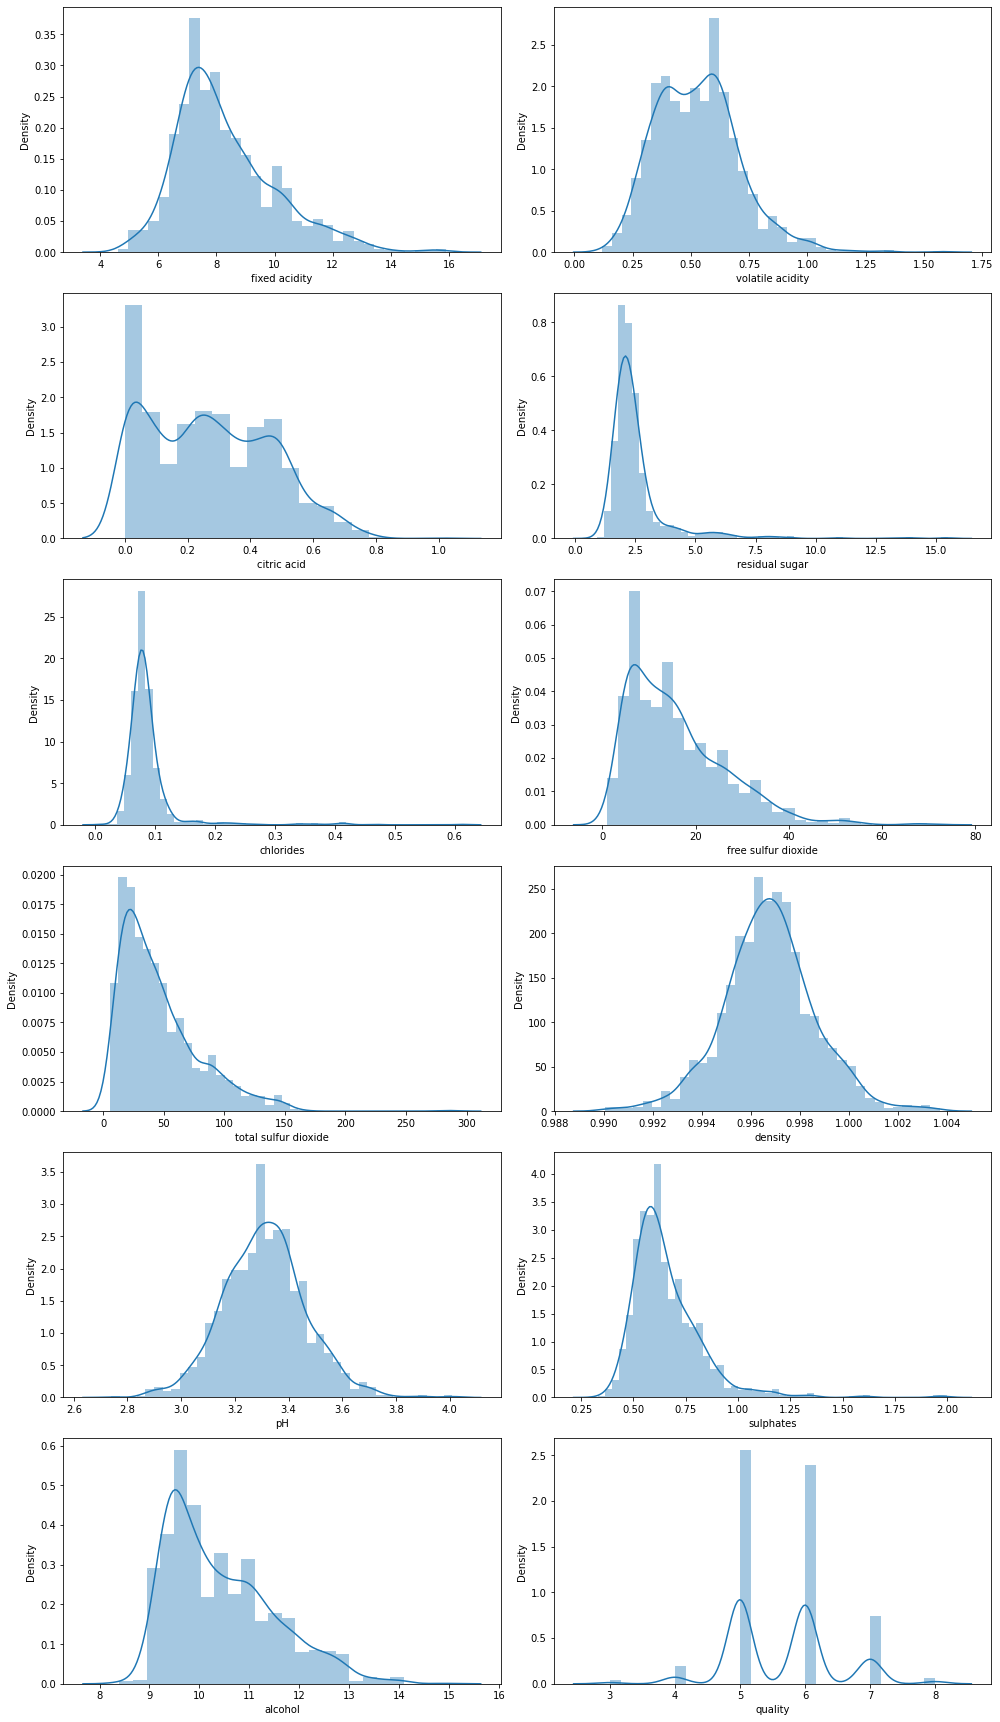

In [14]:
cols = 2
rows = math.ceil(len(wine_df.columns)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))

for i, col in enumerate(wine_df.columns):
    ax = axes[i//cols, i%cols]
    sns.distplot(wine_df[col], kde=True, ax=ax)

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

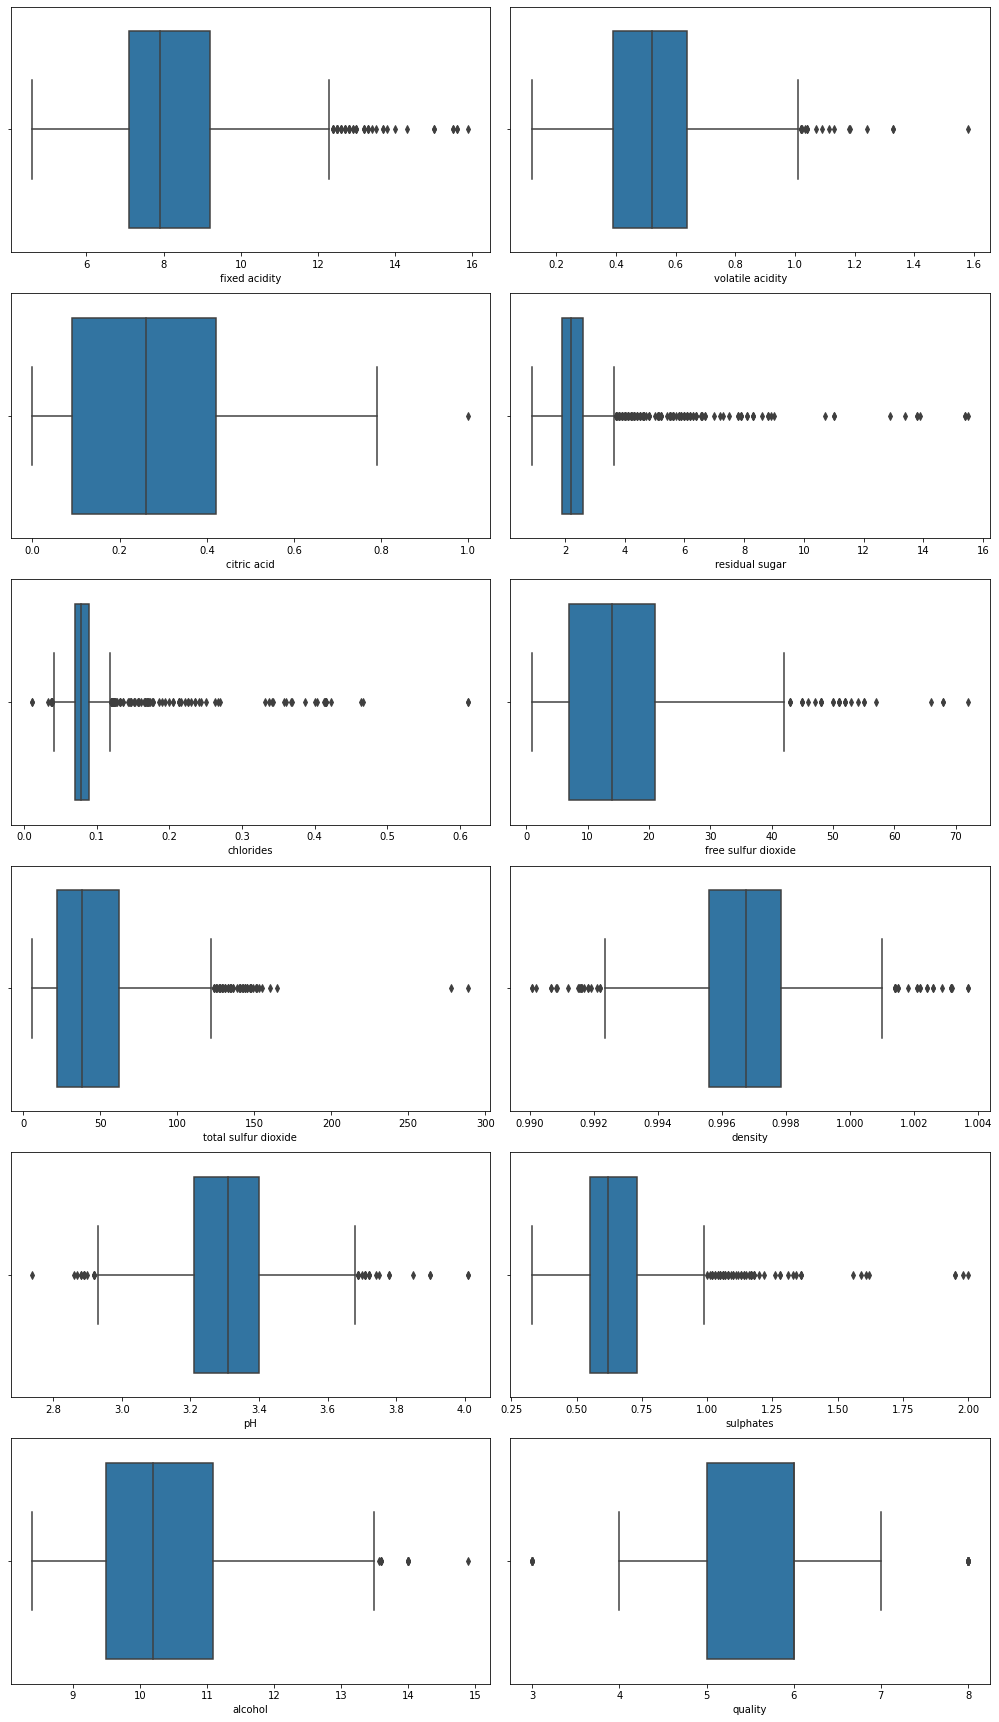

In [33]:
cols = 2
rows = math.ceil(len(wine_df.columns)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))

for i, col in enumerate(wine_df.columns):
    ax = axes[i//cols, i%cols]
    # wine_df[col]=np.log(wine_df[col])
    sns.boxplot(wine_df[col], ax=ax)

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

#Correlations (Analysis with quality)

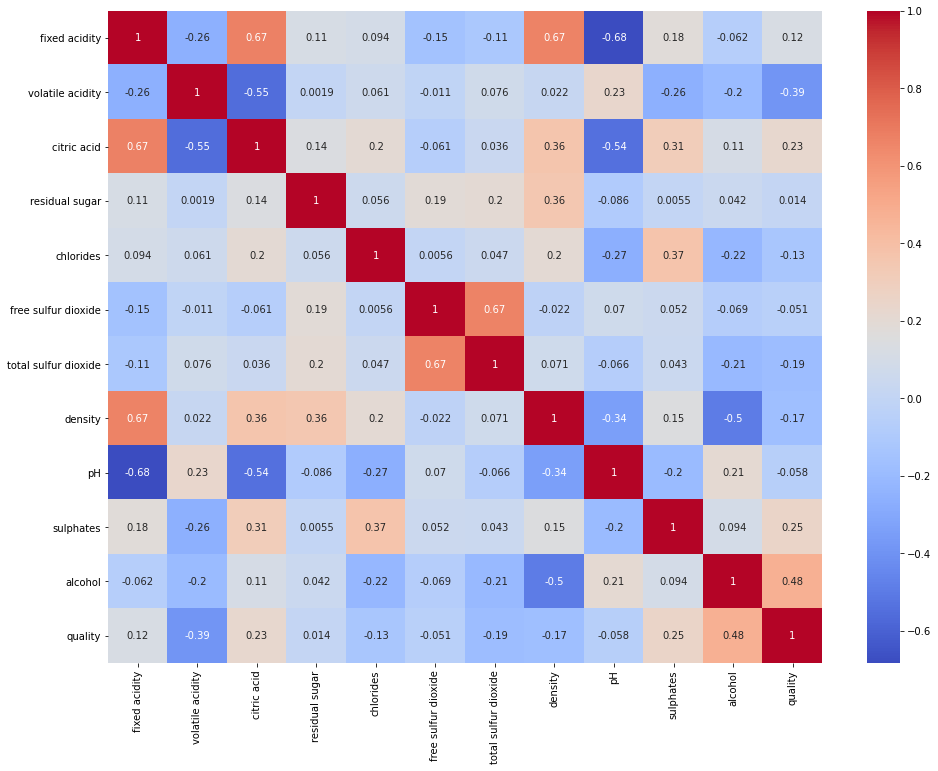

In [35]:
plt.figure(figsize=(16,12))
sns.heatmap(wine_df.corr(), annot=True,cmap='coolwarm')

**Few strong correlation are observed from above:**

fixed acidity and ph

fixed acidity and density

fixed acidity and citric acid

free sulfur dioxide and total sulfur dioxide


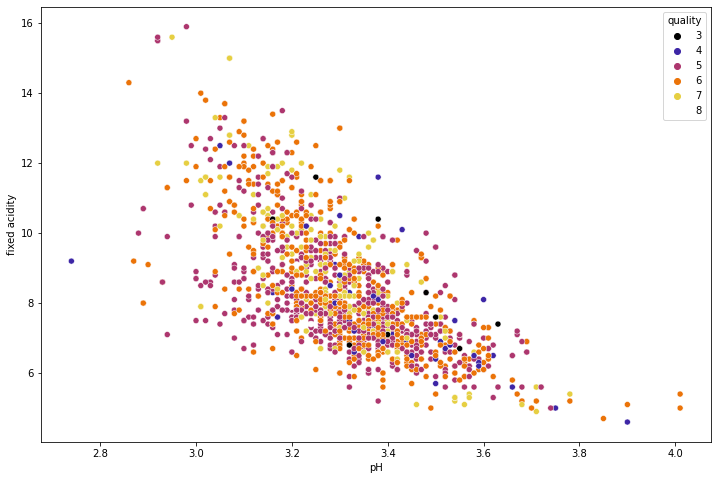

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='fixed acidity', x='pH', data=wine_df, hue='quality', palette='CMRmap')

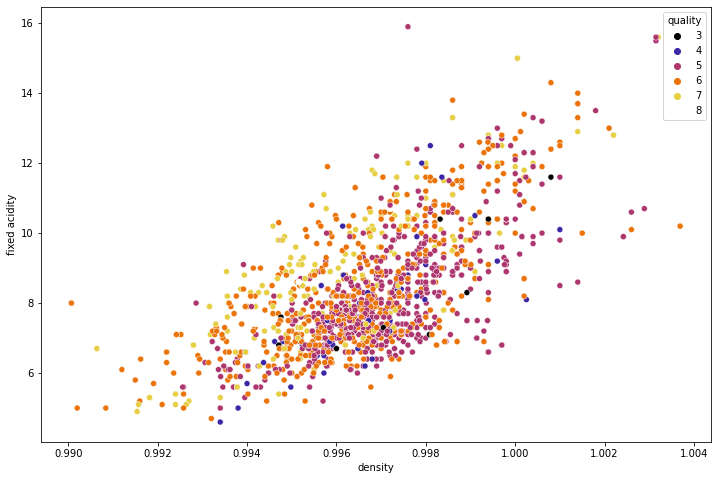

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='fixed acidity', x='density', data=wine_df, hue='quality', palette='CMRmap')

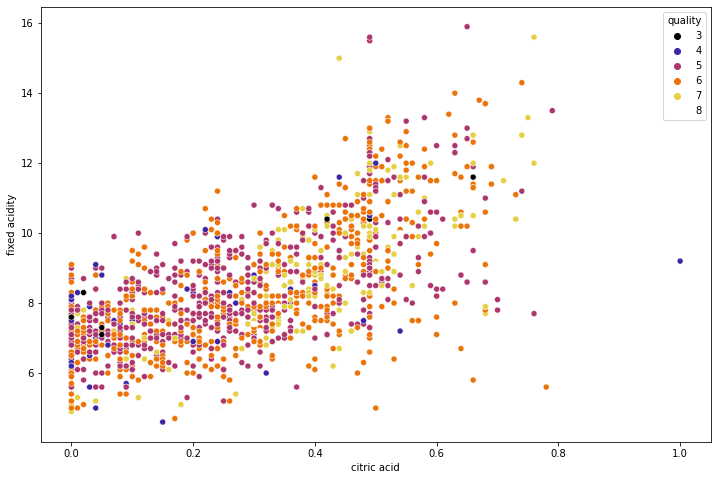

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='fixed acidity', x='citric acid', data=wine_df, hue='quality', palette='CMRmap')

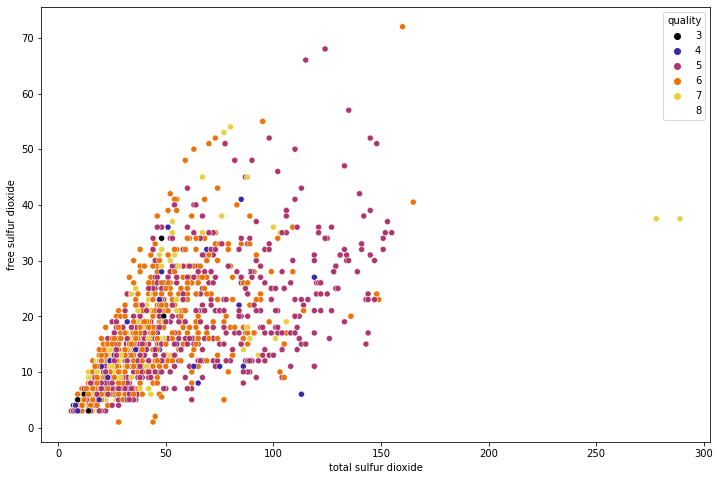

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='free sulfur dioxide', x='total sulfur dioxide', data=wine_df, hue='quality', palette='CMRmap')

***Few features have good correlation with quality***

1. alcohol

2. volatile acidity

<Figure size 864x576 with 0 Axes>

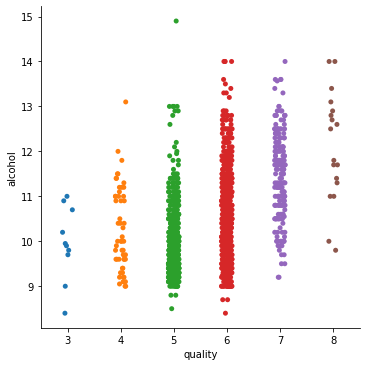

In [63]:
plt.figure(figsize=(12,8))
sns.catplot(y='alcohol', x='quality', data=wine_df)

<Figure size 864x576 with 0 Axes>

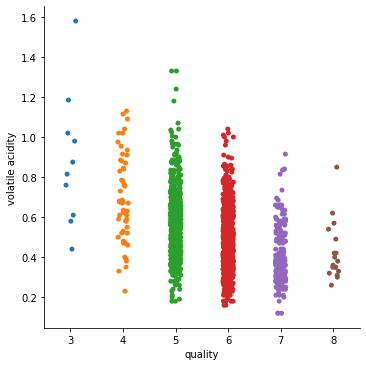

In [62]:
plt.figure(figsize=(12,8))
sns.catplot(y='volatile acidity', x='quality', data=wine_df)

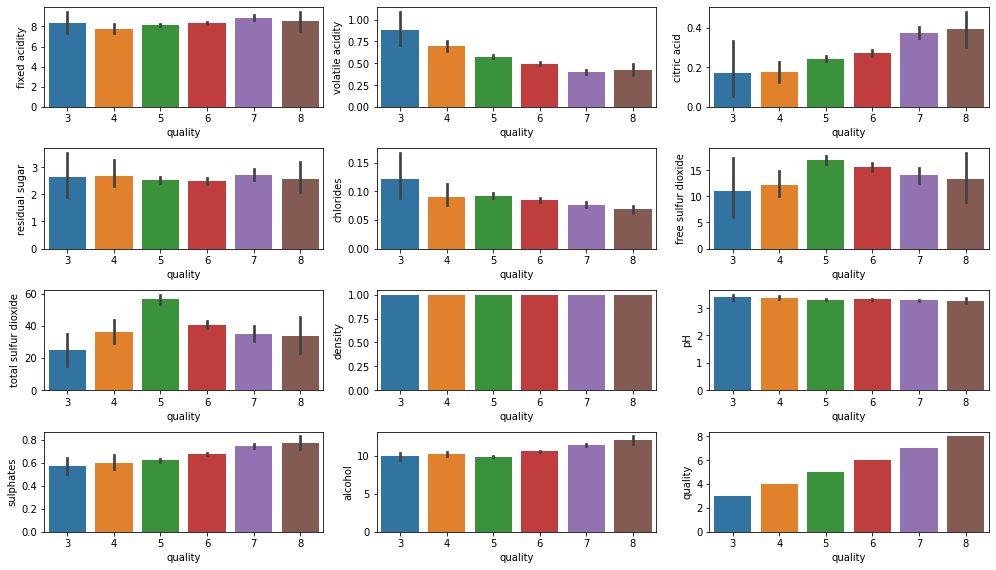

In [66]:
cols = 3
rows = math.ceil(len(wine_df.columns)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))

for i, col in enumerate(wine_df.columns):
    ax = axes[i//cols, i%cols]
    # wine_df[col]=np.log(wine_df[col])
    sns.barplot(x='quality', y=col, data=wine_df, ax=ax)

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

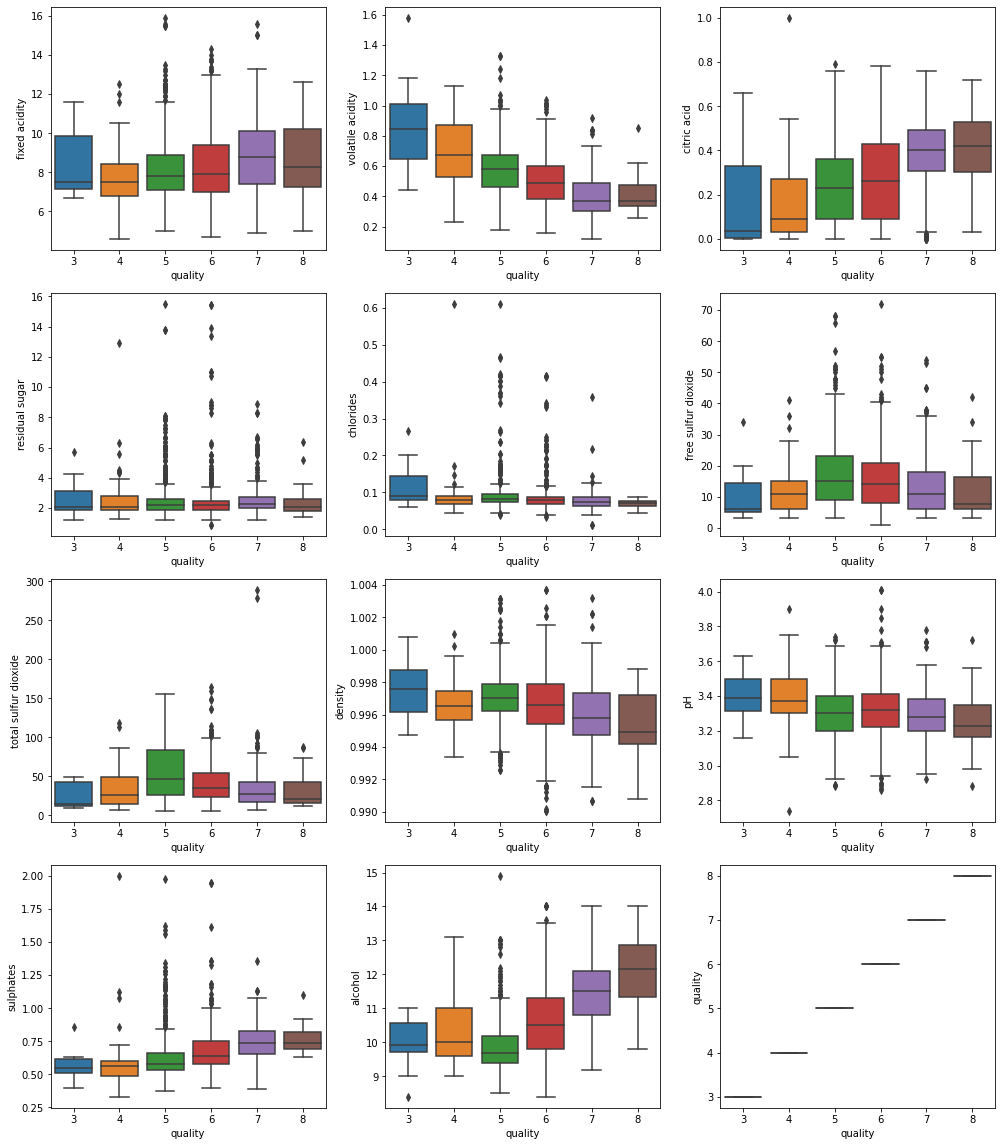

In [70]:
cols = 3
rows = math.ceil(len(wine_df.columns)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 12//cols*rows))

for i, col in enumerate(wine_df.columns):
    ax = axes[i//cols, i%cols]
    # wine_df[col]=np.log(wine_df[col])
    sns.boxplot(x='quality', y=col, data=wine_df, ax=ax)

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

Plotly interactive graph - fixed acidity, pH and quality

In [77]:
import plotly.express as px
fig = px.scatter(wine_df, x='pH', y="fixed acidity", color="quality",hover_data=['quality', 'citric acid'])
fig.show()

In [91]:
fig = px.scatter_3d(wine_df, x='pH', y='fixed acidity', z='citric acid',
              color='quality',  opacity=0.7, size_max=100)
fig.update_traces(marker=dict(size=4))
fig.show()

We are able to see that the yellow ones (good quality wines) are mostly above 0.2/0.3 citric acid, with lower pH and higher fixed acidity.

In [92]:
fig = px.scatter_3d(wine_df, x='pH', y='fixed acidity', z='volatile acidity',
              color='quality',  opacity=0.7)
fig.update_traces(marker=dict(size=4))
fig.show()

Bad wines (dark color markers) are of higher volatile acidity